In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np


# **La fonction marche d'heaviside qui nous servira de fonction  d'activation**

In [3]:
#heviside fonction
# reference : https://github.com/exo7math/deepmath-exo7

def heaviside(x):
	""" Définis la fonction de Heaviside qui n'est pas défini
	par défaut dans keras. A utiliser comme fonction 
	d'activiation lors de la définition d'une couche par exemple
	    modele.add(Dense(4,activation=heaviside))
	Attention il n'y a pas de guillemet ici.
	Astuce de la formule : H(x) = 1/2 (1+|x|) """

	# return (1+x/K.abs(x))/2
	# return (1+K.sign(x))/2

	z = K.zeros_like(x)	
	return 1-K.maximum(z,K.sign(-x))

# **modele d'un escalier**
![alt text](modele_escalier.png "escalier")


# **modele d'un escalier**
![alt text](graph.png "graphique")

# **La fonction createStairs va generer les poids pour un escalier d'abcsisses a et b**

In [4]:
def createStairs(a, b):
    coef = list()
    biais = list()

    if a < 0:
        coef.append(-1/a)
        biais.append(1)
    elif a > 0:
        coef.append(1/a)
        biais.append(-1)
    else:
        coef.append(1)
        biais.append(0)

    if b < 0:
        coef.append(1/b)
        biais.append(-1)
    elif b > 0:
        coef.append(-1/b)
        biais.append(1)
    else:
        coef.append(-1)
        biais.append(0)

    return coef, biais

# **La fonction qui cree le modele pour apromixer la fonction f dans l'intervalle [a, b] avec n escalier**

In [5]:

def createModel(f, a, b, n): 

    model = Sequential()
    model.add(Dense(2*n, input_dim=1, activation=heaviside))
    # On specifie pas la fonction d'activation donc par defaut on aura la fonction identite
    model.add(Dense(1,))

    # generation des abcsisses des escalier
    stairPoints = np.linspace(a, b, n+1)

    coef_c0 = np.array([
            createStairs(stairPoints[i], 
            stairPoints[i+1])[0] for i in range(n)])

    #poids de la couche 0 de neurone
    biais_c0 = np.array([
            createStairs(stairPoints[i], 
            stairPoints[i+1])[1] for i in range(n)])

    coef_c0.resize(2*len(coef_c0))
    coef_c0 = np.array([coef_c0])
   
    biais_c0.resize(2*len(biais_c0))
    poids_c0 = [coef_c0, biais_c0]
    

    model.layers[0].set_weights(poids_c0)

    #poids de la couche 1 de neurone
    coef_c1 = [[f(a)] for i in stairPoints[0:n] for a in (i, i)]
    biais_c1 = np.array([-sum([i[0] for i in coef_c1])/2])
    coef_c1, biais_c1 = np.array(coef_c1), np.array(biais_c1)
    poids_c1 = [coef_c1, biais_c1]

    model.layers[1].set_weights(poids_c1)

    #Trace du graphe
    """
    val_x = np.linspace(-5, 5, 100)
    val_y = [y[0] for y in model.predict(val_x)]
    plt.plot(val_x, val_y)
    plt.plot(val_x, f(val_x))
    plt.tight_layout()
    plt.show()
    """
    return model


# **Et enfin le test**

2021-09-20 20:21:12.070859: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-20 20:21:12.071540: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-20 20:21:12.073685: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2021-09-20 20:21:13.285890: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-20 20:21:13.302334: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1600000000 Hz


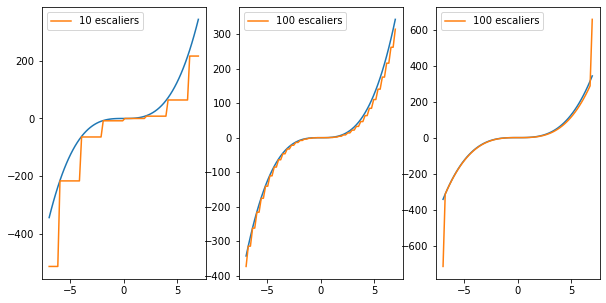

In [6]:

f = lambda x: x**3

myModel1 = createModel(f,-10 , 10, 10)
myModel2 = createModel(f, -10, 10, 50)
myModel3 = createModel(f, -10, 10, 100)

X = np.linspace(-7, 7, 70)
Y_1 = [y[0] for y in myModel1.predict(X)]
Y_2 = [y[0] for y in myModel2.predict(X)]
Y_3 = [y[0] for y in myModel3.predict(X)]

fig, (axes1, axes2, axes3) = plt.subplots(3, 1, figsize=(15, 15))

axes1.plot(X, f(X))
axes1.plot(X, Y_1, label="10 escaliers")
axes1.legend()

axes2.plot(X, f(X))
axes2.plot(X, Y_2, label="100 escaliers")
axes2.legend()

axes3.plot(X, f(X))
axes3.plot(X, Y_3, label="100 escaliers")
axes3.legend()
plt.show()